In [58]:
import pandas as pd
import plotly.express as px

In [59]:
# from google.colab import auth
# auth.authenticate_user()  # Isso só precisa ser feito uma vez

# from google.colab import drive

# drive.mount('/content/drive')

In [60]:
link = 'https://raw.githubusercontent.com/alura-cursos/series_temporais_prophet/refs/heads/main/Dados/poluentes.csv'

In [61]:
df = pd.read_csv(link)

In [62]:
df.head()

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0


In [63]:
df['Data'] = pd.to_datetime(df['Data'])

In [64]:
fig = px.line(df, x='Data', y = 'O3')
fig.show()

In [65]:
df_2022 = df[df['Data'].dt.year == 2022]

df_2022_mensal = df_2022.groupby(df_2022['Data'].dt.month)['O3'].mean().reset_index()

In [66]:
df_2022_mensal

,Data,O3
0,1,19.193548
1,2,46.000000
2,3,54.000000
3,4,77.333333
4,5,100.677419
5,6,102.000000
6,7,120.903226
7,8,96.612903
8,9,64.366667
9,10,41.548387


In [67]:
import calendar

df_2022_mensal['Mês']  = df_2022_mensal['Data'].apply(lambda x: calendar.month_abbr[x])

fig = px.bar(df_2022_mensal, x='Mês', y='O3', title='Média de O3 ug/m3 por mês em 2022')
fig.show()

Biblioteca Prophet para séris temporais

[site da documentação do Prophet](https://prophet.readthedocs.io/en/latest/)

[sobre o Prophet](https://facebook.github.io/prophet/)

[Trend Changepoints](https://facebook.github.io/prophet/docs/trend_changepoints.html)

[Fourier Order for Seasonalities](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#fourier-order-for-seasonalities)

[Seasonality, Holiday Effects, And Regressors](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events)


In [68]:
from prophet import Prophet

In [69]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = df['Data']
df_prophet['y'] = df['O3']

In [70]:
df_prophet

,ds,y
0,2020-03-01,64.0
1,2020-03-02,30.0
2,2020-03-03,19.0
3,2020-03-04,54.0
4,2020-03-05,68.0
...,...,...
1455,2024-02-24,51.0
1456,2024-02-25,66.0
1457,2024-02-26,49.0
1458,2024-02-27,37.0


In [71]:
import numpy as np

np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=365, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/h2b_ingq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/41_gv_5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71769', 'data', 'file=/tmp/tmp5bhm3yr_/h2b_ingq.json', 'init=/tmp/tmp5bhm3yr_/41_gv_5u.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_modelzbyagql5/prophet_model-20250203225739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
from prophet.plot import plot_plotly

fig = plot_plotly(modelo, previsao)
fig.show()

In [73]:
# o y previsto é o yhat
# yhat_lower é o intervalo de confiança inferior
# yhat_upper é o intervalo de confiança superior
previsao[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-01,19.138290,-11.423571,49.879511
1,2020-03-02,23.271165,-6.297502,54.194609
2,2020-03-03,26.149390,-7.189595,56.245281
3,2020-03-04,24.995749,-5.920984,55.542039
4,2020-03-05,26.295848,-3.379147,56.557718
...,...,...,...,...
1820,2025-02-23,40.569606,9.516483,69.112572
1821,2025-02-24,43.831442,13.974234,73.743592
1822,2025-02-25,45.915345,16.612816,76.757365
1823,2025-02-26,44.061285,13.276886,73.417160


In [74]:
# grafico de componentes
from prophet.plot import plot_components_plotly

plot_components_plotly(modelo, previsao)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [75]:
df_prophet.shape

(1460, 2)

In [76]:
tamanho_treino = int(len(df_prophet) * 0.8)
tamanho_teste = int(len(df_prophet) * 0.2)
print(f'O tamanho do treino é: {tamanho_treino}')
print(f'O tamanho do teste é: {tamanho_teste}')

O tamanho do treino é: 1168
O tamanho do teste é: 292


In [77]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:1168]
df_treino['y'] = df_prophet['y'][:1168]

In [78]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][1168:]
df_teste['y'] = df_prophet['y'][1168:]

In [79]:
np.random.seed(4587)
modelo = Prophet()

modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods = 292, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/vi25qxd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/k0mpa5te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18023', 'data', 'file=/tmp/tmp5bhm3yr_/vi25qxd6.json', 'init=/tmp/tmp5bhm3yr_/k0mpa5te.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_modeleq2wqlg1/prophet_model-20250203225740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


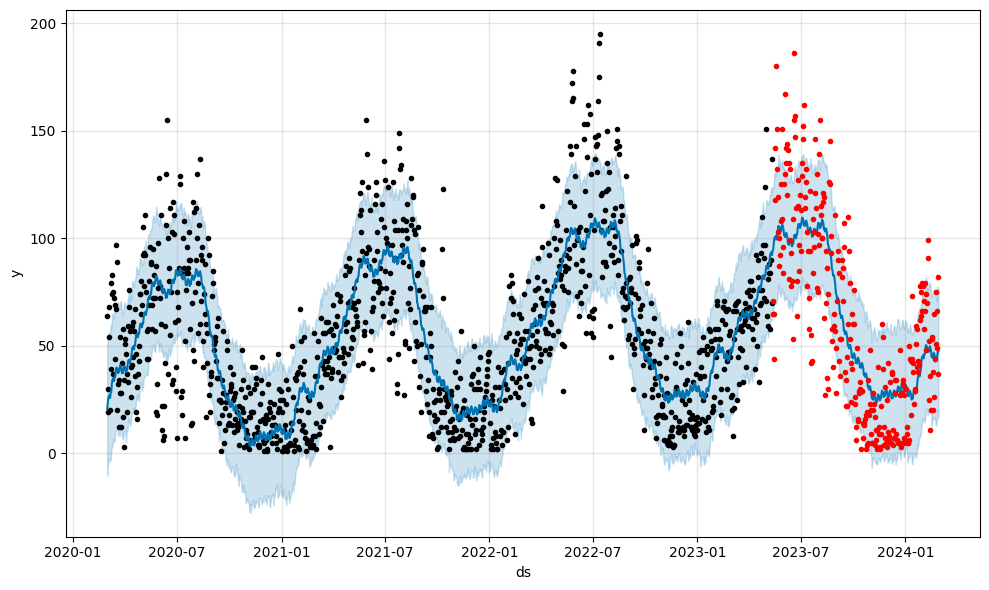

In [80]:
import matplotlib.pyplot as plt

fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.show()


In [81]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds', how='inner')
df_comparacao

,ds,yhat,y
0,2023-05-13,94.354778,65.0
1,2023-05-14,94.701462,71.0
2,2023-05-15,97.764579,44.0
3,2023-05-16,100.048702,65.0
4,2023-05-17,100.330364,118.0
...,...,...,...
287,2024-02-24,43.913883,51.0
288,2024-02-25,43.408351,66.0
289,2024-02-26,45.756511,49.0
290,2024-02-27,47.476012,37.0


In [82]:
mse = sum((df_comparacao['y'] - df_comparacao['yhat'])**2)/df_comparacao['y'].shape[0]

In [83]:
mse

710.7306543150685

In [84]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
rmse

26.659532147340258

In [85]:
mse

710.7306543150687

In [86]:
rmse = np.sqrt(mse)
rmse

26.659532147340258

In [87]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=0, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/90jkfy0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/xp8roetz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69459', 'data', 'file=/tmp/tmp5bhm3yr_/90jkfy0b.json', 'init=/tmp/tmp5bhm3yr_/xp8roetz.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_modeluffyopgv/prophet_model-20250203225741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [88]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [89]:
sem_outliers.reset_index(drop = True, inplace=True)

In [90]:
sem_outliers.shape

(1201, 2)

In [91]:
tamanho_treino = int(len(sem_outliers) * 0.8)
tamanho_teste = int(len(sem_outliers) * 0.2)
print(f'O tamanho do treino é: {tamanho_treino}')
print(f'O tamanho do teste é: {tamanho_teste}')

O tamanho do treino é: 960
O tamanho do teste é: 240


In [92]:
# df_treino_sem_outliers = pd.DataFrame()

# df_treino_sem_outliers['ds'] = df_prophet['ds'][:960]
# df_treino_sem_outliers['y'] = df_prophet['y'][:960]

# df_teste_sem_outliers = pd.DataFrame()
# df_teste_sem_outliers['ds'] = df_prophet['ds'][960:]
# df_teste_sem_outliers['y'] = df_prophet['y'][960:]

df_treino_sem_outliers = pd.DataFrame()

df_treino_sem_outliers['ds'] = sem_outliers['ds'][:946]
df_treino_sem_outliers['y'] = sem_outliers['y'][:946]

df_teste_sem_outliers = pd.DataFrame()

df_teste_sem_outliers['ds'] = sem_outliers['ds'][946:]
df_teste_sem_outliers['y'] = sem_outliers['y'][946:]

Treinando o modelo sem outliers

In [93]:
# np.random.seed(4587)

# modelo = Prophet()
# modelo.fit(df_treino_sem_outliers)
# futuro = modelo.make_future_dataframe(periods=365, freq ='D')
# previsao = modelo.predict(futuro)

np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino_sem_outliers)
futuro = modelo.make_future_dataframe(periods=365, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/z_zt7q0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/0q7k9p57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40081', 'data', 'file=/tmp/tmp5bhm3yr_/z_zt7q0_.json', 'init=/tmp/tmp5bhm3yr_/0q7k9p57.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_model3g54sk63/prophet_model-20250203225742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


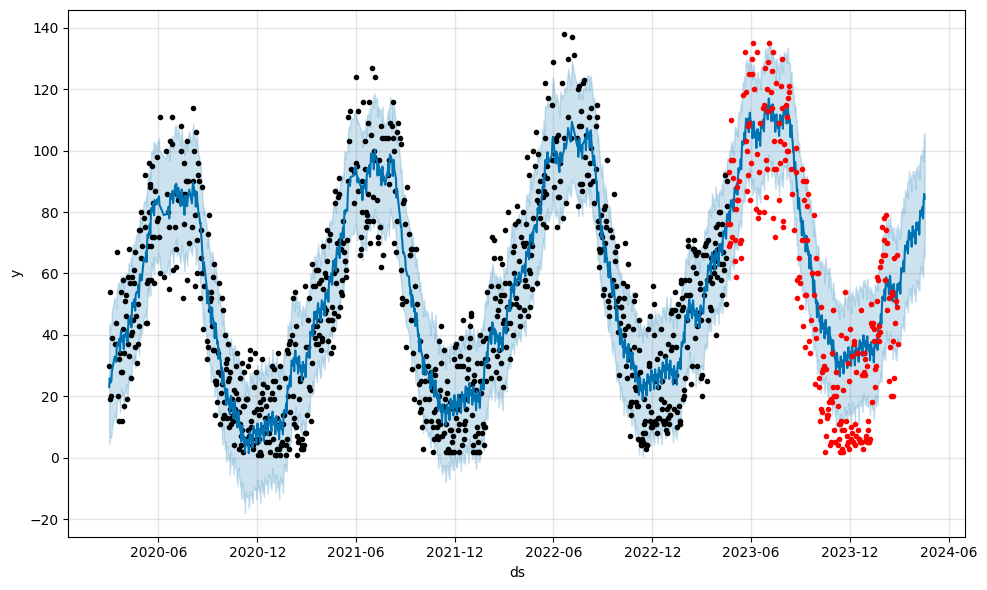

In [94]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste_sem_outliers['ds'],df_teste_sem_outliers['y'],'.r')
plt.show()

In [95]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_sem_outliers, on='ds', how='inner')
df_comparacao

,ds,yhat,y
0,2023-04-20,78.532796,76.0
1,2023-04-21,77.524175,69.0
2,2023-04-22,80.178972,93.0
3,2023-04-23,76.224048,70.0
4,2023-04-24,81.288777,76.0
...,...,...,...
250,2024-02-22,53.896207,44.0
251,2024-02-24,54.084275,51.0
252,2024-02-25,49.603108,66.0
253,2024-02-26,54.281006,49.0


In [96]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
rmse

19.661453617936505

Avaliando tendencia

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/gprakkjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/amzo4_si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80939', 'data', 'file=/tmp/tmp5bhm3yr_/gprakkjr.json', 'init=/tmp/tmp5bhm3yr_/amzo4_si.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_model74ad_ubk/prophet_model-20250203225743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


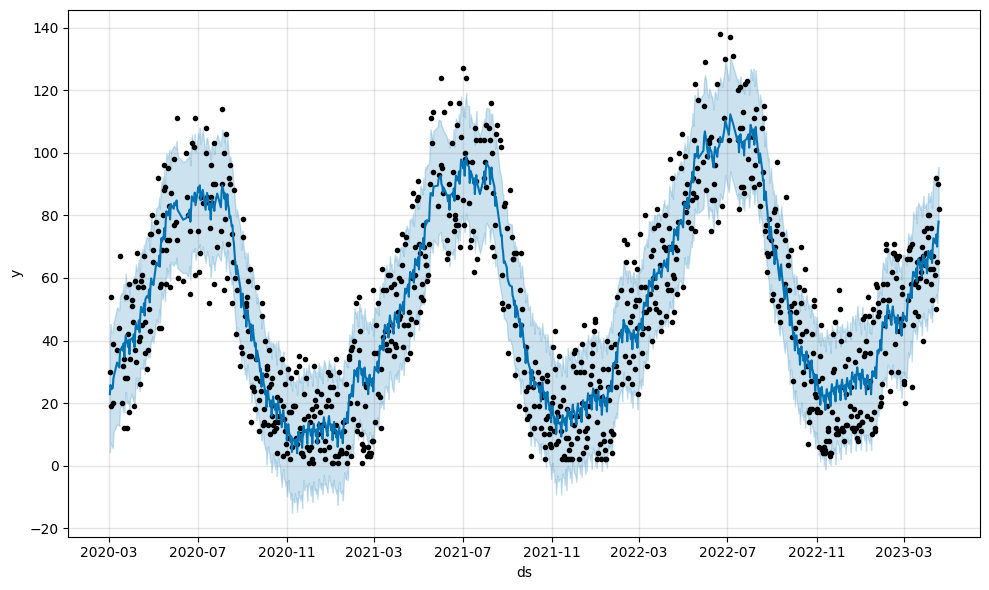

In [97]:
np.random.seed(4587)

modelo = Prophet(changepoint_prior_scale = 0.5)
modelo.fit(df_treino_sem_outliers)
futuro = modelo.make_future_dataframe(periods=0, freq='D')
previsao = modelo.predict(futuro)


fig = modelo.plot(previsao)

In [98]:

fig = plot_components_plotly(modelo, previsao)
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/n21fazf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/jze0sauj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96097', 'data', 'file=/tmp/tmp5bhm3yr_/n21fazf9.json', 'init=/tmp/tmp5bhm3yr_/jze0sauj.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_modeldj1g3_pk/prophet_model-20250203225744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


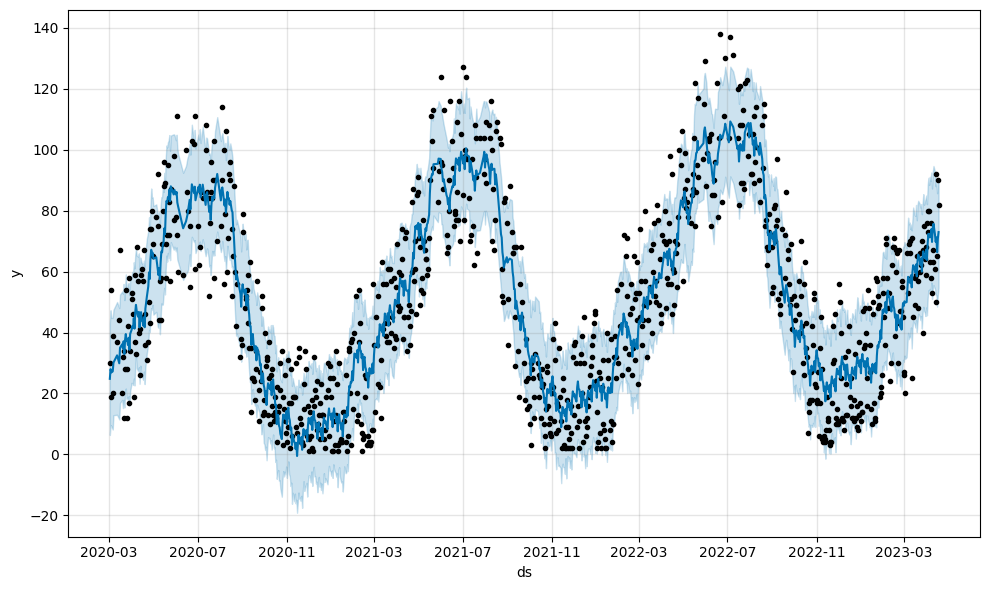

In [99]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality = 20)
modelo.fit(df_treino_sem_outliers)
futuro = modelo.make_future_dataframe(periods=0, freq='D')
previsao = modelo.predict(futuro)


fig = modelo.plot(previsao)

In [100]:
fig = plot_components_plotly(modelo, previsao)
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



#

O Prophet possui diversos parâmetros que podem ser ajustados para melhorar o desempenho do modelo. Dois deles conhecemos em aula, changepoint_prior_scale e yearly_seasonality.

  - changepoint_prior_scale: é um dos mais importantes no modelo Prophet, pois determina a flexibilidade da tendência. Especificamente, ele controla o quanto a tendência pode mudar nos pontos de mudança (changepoints). Se o valor deste parâmetro for muito pequeno, a tendência será pouco ajustada (underfit), e variações que deveriam ser modeladas como mudanças na tendência acabarão sendo tratadas como ruído. Por outro lado, se o valor for muito grande, a tendência será excessivamente ajustada (overfit), podendo até capturar sazonalidades anuais, o que não é desejado. O valor padrão de 0.05 funciona bem para muitas séries temporais, mas pode ser ajustado. Uma faixa de valores recomendada é entre 0.001 e 0.5, geralmente ajustados em uma escala logarítmica.

  - yearly_seasonality: controla se a sazonalidade anual deve ser incluída no modelo. Ele pode ser configurado como 'auto', True, False, ou como um número específico de termos de Fourier a serem gerados. Por padrão ('auto'), a sazonalidade anual será ativada se houver pelo menos um ano de dados disponíveis; caso contrário, será desativada. Se houver mais de um ano de dados, a biblioteca informa que geralmente é mais eficaz deixar a sazonalidade anual ativada e ajustar a influência da sazonalidade usando o parâmetro seasonality_prior_scale, em vez de tentar desativar a sazonalidade durante a otimização de hiperparâmetros.

Além desses, existem outros parâmetros que podemos utilizar em projetos e que podem ser bastante úteis. Vamos conhecer alguns deles?

  - seasonality_prior_scale: modula a força do modelo de sazonalidade no Prophet. Ele controla a flexibilidade da sazonalidade, permitindo que o modelo se ajuste a grandes flutuações sazonais ou, ao contrário, amortecendo a sazonalidade. Valores maiores permitem que o modelo capture flutuações sazonais mais intensas, enquanto valores menores reduzem a magnitude da sazonalidade. O valor padrão é 10, o que essencialmente não aplica nenhuma regularização, pois raramente se observa sobreajuste neste contexto. Uma faixa razoável para ajuste seria entre 0.01 e 10; ao definir 0.01, a magnitude da sazonalidade é forçada a ser muito pequena.

  - seasonality_mode: pode ser configurado como 'additive' (aditivo) ou 'multiplicative' (multiplicativo). O padrão é 'additive', mas muitas séries temporais apresentam sazonalidade multiplicativa. Isso pode ser identificado visualmente na série temporal, observando se a magnitude das flutuações sazonais cresce com a magnitude da série temporal. A sazonalidade aditiva adiciona um componente fixo ao valor da série temporal, enquanto a multiplicativa escala a sazonalidade com a magnitude da série.

    - changepoint_range: define a proporção do histórico onde os pontos de mudança de tendência serão estimados. O valor padrão é 0.8, ou seja, 80% do histórico, significando que o modelo não ajustará mudanças de tendência nos últimos 20% da série temporal. Isso é feito para evitar sobreajuste nas mudanças de tendência no final da série, onde pode não haver dados suficientes para um bom ajuste. Em contextos totalmente automatizados, pode ser benéfico ser menos conservador com esse parâmetro. Em um grande número de séries temporais, uma faixa razoável para este parâmetro seria entre 0.8 e 0.95.

    - changepoints: é uma lista de datas específicas onde pontos de mudança na tendência (changepoints) devem ser incluídos. Se não for especificado, o Prophet seleciona automaticamente os pontos de mudança potenciais. Este parâmetro é útil para especificar manualmente a localização dos pontos de mudança, com base no conhecimento prévio ou eventos conhecidos que podem ter impactado a tendência. Por padrão, nenhum ponto de mudança é especificado manualmente, e o Prophet os posiciona automaticamente.

    - n_changepoints: define o número de pontos de mudança potenciais a serem incluídos no modelo. Esse parâmetro não é usado se a lista changepoints for fornecida. Se changepoints não for fornecido, então pontos de mudança potenciais são selecionados uniformemente na primeira proporção changepoint_range do histórico. O valor padrão é 25, o que geralmente é suficiente para capturar as mudanças de tendência em uma série temporal típica que se adapta bem ao Prophet. Em vez de aumentar ou diminuir o número de pontos de mudança, é mais eficaz focar em aumentar ou diminuir a flexibilidade nas mudanças de tendência, o que é feito com o parâmetro changepoint_prior_scale.

Para acesso a todas as opções de parâmetros, suas funções e valores permitidos também acesse as [informações da classe Prophet no github](https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py).
Extra: Busca grid de melhores combinações de parâmetros

Em sua documentação, o Prophet traz um exemplo de como realizar a busca por melhores combinações de hiperparâmetros através de uma busca grid. O exemplo de código foi traduzido e está disponível na celula abaixo comentado.

O código começa importando as bibliotecas necessárias e definindo uma grade de parâmetros (param_grid) para ajuste de hiperparâmetros. Ele gera todas as combinações possíveis desses parâmetros utilizando itertools.product. Em seguida, cria uma lista para armazenar os valores de RMSE para cada combinação de parâmetros. Utiliza validação cruzada para avaliar cada combinação de parâmetros, ajustando o modelo Prophet a cada vez e calculando as métricas de desempenho, especificamente o RMSE, que são armazenadas na lista.

  Observação: a validação cruzada será um tema abordado, de modo mais profundo, mais à frente no curso.

Depois de avaliar todas as combinações, os resultados são compilados em um DataFrame (tuning_results), que é exibido. Finalmente, a combinação de parâmetros que resulta no menor RMSE é identificada em best_params e impressa.

Para ter acesso a toda parte da documentação, que explica esses passos e informa os hiperparâmetros que são mais e menos recomendados a serem utilizados na busca de melhores hiperparâmetros, consulte o [texto](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) Hyperparameter tuning.

  - Atenção: é importante ressaltar que as recomendações de valores de alguns hiperparâmetros descritos em Hyperparameter tuning não abrangem todas as opções de configurações que a biblioteca oferece. Por exemplo, podemos configurar o yearly_seasonality como 'auto', True, False, ou como um número específico de termos de Fourier a serem gerados, mas o texto em Hyperparameter tuning informa apenas a lista ['auto', True, False].


In [101]:
# import itertools
# import numpy as np
# import pandas as pd

# param_grid = {
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Gerar todas as combinações de parâmetros
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Armazenar os RMSEs para cada conjunto de parâmetros aqui

# # Usar validação cruzada para avaliar todos os parâmetros
# for params in all_params:
#     m = Prophet(**params).fit(df)  # Ajustar o modelo com os parâmetros fornecidos
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])

# # Encontrar os melhores parâmetros
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

# best_params = all_params[np.argmin(rmses)]
# print(best_params)

O código começa importando as bibliotecas necessárias e definindo uma grade de parâmetros (param_grid) para ajuste de hiperparâmetros. Ele gera todas as combinações possíveis desses parâmetros utilizando itertools.product. Em seguida, cria uma lista para armazenar os valores de RMSE para cada combinação de parâmetros. Utiliza validação cruzada para avaliar cada combinação de parâmetros, ajustando o modelo Prophet a cada vez e calculando as métricas de desempenho, especificamente o RMSE, que são armazenadas na lista.

Observação: a validação cruzada será um tema abordado, de modo mais profundo, mais à frente no curso.

Depois de avaliar todas as combinações, os resultados são compilados em um DataFrame (tuning_results), que é exibido. Finalmente, a combinação de parâmetros que resulta no menor RMSE é identificada em best_params e impressa.

Para ter acesso a toda parte da documentação, que explica esses passos e informa os hiperparâmetros que são mais e menos recomendados a serem utilizados na busca de melhores hiperparâmetros, consulte o texto [Hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning).

Atenção: é importante ressaltar que as recomendações de valores de alguns hiperparâmetros descritos em Hyperparameter tuning não abrangem todas as opções de configurações que a biblioteca oferece. Por exemplo, podemos configurar o yearly_seasonality como 'auto', True, False, ou como um número específico de termos de Fourier a serem gerados, mas o texto em Hyperparameter tuning informa apenas a lista ['auto', True, False].


#Ajustando o modelo, modelo final

In [102]:
np.random.seed(4587)

modelo_final = Prophet(changepoint_prior_scale = 0.5, yearly_seasonality = 20)

modelo_final.fit(df_treino_sem_outliers)
futuro = modelo_final.make_future_dataframe(periods = 365, freq = 'D')
previsao = modelo_final.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/yfxomwlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/wq5l3l86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5511', 'data', 'file=/tmp/tmp5bhm3yr_/yfxomwlf.json', 'init=/tmp/tmp5bhm3yr_/wq5l3l86.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_modeluk8tdw4r/prophet_model-20250203225745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


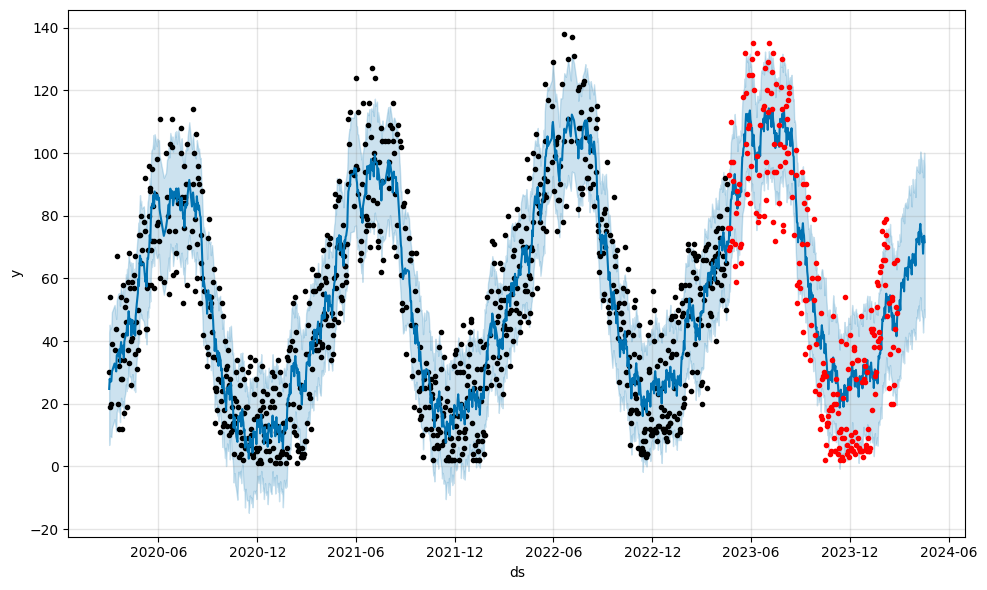

In [103]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste_sem_outliers['ds'],df_teste_sem_outliers['y'],'.r')
plt.show()

In [104]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_sem_outliers, on='ds', how='inner')
df_comparacao

,ds,yhat,y
0,2023-04-20,71.574196,76.0
1,2023-04-21,71.492894,69.0
2,2023-04-22,75.754336,93.0
3,2023-04-23,73.642321,70.0
4,2023-04-24,80.724282,76.0
...,...,...,...
250,2024-02-22,45.017473,44.0
251,2024-02-24,45.539587,51.0
252,2024-02-25,41.551553,66.0
253,2024-02-26,46.869457,49.0


In [105]:

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
rmse

17.694313529066097

# Validação cruzada

In [115]:
from prophet.diagnostics import cross_validation

# horizon é o dobro do period

df_cv = cross_validation(modelo_final, initial = '365.25, days', period ='45 days', horizon='90 days')

INFO:prophet:Making 16 forecasts with cutoffs between 2021-03-14 00:00:00 and 2023-01-18 00:00:00


  0%|          | 0/16 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/w2rwxrsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/w0ov11nj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95993', 'data', 'file=/tmp/tmp5bhm3yr_/w2rwxrsh.json', 'init=/tmp/tmp5bhm3yr_/w0ov11nj.json', 'output', 'file=/tmp/tmp5bhm3yr_/prophet_model4nxgysnw/prophet_model-20250203232354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/wtt8t19m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5bhm3yr_/na2_jezb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [116]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-16,39.982065,22.765787,57.083461,43.0,2021-03-14
1,2021-03-17,41.398339,24.048659,56.861262,39.0,2021-03-14
2,2021-03-18,41.299427,24.592193,57.847156,56.0,2021-03-14
3,2021-03-19,38.074225,22.194911,55.218715,37.0,2021-03-14
4,2021-03-20,37.018082,21.172933,53.498352,61.0,2021-03-14
...,...,...,...,...,...,...
1190,2023-04-14,63.289285,43.452592,81.557763,92.0,2023-01-18
1191,2023-04-15,63.752546,45.243773,81.452534,50.0,2023-01-18
1192,2023-04-16,57.749651,38.874029,77.116818,65.0,2023-01-18
1193,2023-04-17,61.594638,42.269059,79.348480,90.0,2023-01-18


In [117]:
df_cv['cutoff'].unique()

<DatetimeArray>
['2021-03-14 00:00:00', '2021-04-28 00:00:00', '2021-06-12 00:00:00',
 '2021-07-27 00:00:00', '2021-09-10 00:00:00', '2021-10-25 00:00:00',
 '2021-12-09 00:00:00', '2022-01-23 00:00:00', '2022-03-09 00:00:00',
 '2022-04-23 00:00:00', '2022-06-07 00:00:00', '2022-07-22 00:00:00',
 '2022-09-05 00:00:00', '2022-10-20 00:00:00', '2022-12-04 00:00:00',
 '2023-01-18 00:00:00']
Length: 16, dtype: datetime64[ns]

#Metricas do Prophet

In [118]:
from prophet.diagnostics import performance_metrics


In [119]:
df_p = performance_metrics(df_cv)

In [120]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,259.860339,16.120184,13.646139,0.453076,0.268036,0.370518,0.662665
1,10 days,265.311294,16.288379,13.718962,0.452093,0.270404,0.371037,0.659384
2,11 days,251.559538,15.860629,13.345765,0.414490,0.269692,0.349291,0.689076
3,12 days,240.294670,15.501441,13.016307,0.392070,0.264088,0.335357,0.690276
4,13 days,238.519791,15.444086,12.951580,0.366696,0.264088,0.319655,0.663866
...,...,...,...,...,...,...,...,...
77,86 days,372.805246,19.308165,15.228693,0.560350,0.266880,0.402950,0.649351
78,87 days,348.348363,18.664093,14.978556,0.676933,0.273155,0.410063,0.654169
79,88 days,322.716007,17.964298,14.680513,0.643351,0.266880,0.405707,0.642857
80,89 days,310.692913,17.626483,14.460708,0.578507,0.266880,0.394994,0.644258


In [121]:
df_p['rmse'].mean().round(2)

18.86

In [131]:
df_p.iloc[:,1:].mean().round(2)

,0
mse,360.72
rmse,18.86
mae,15.63
mape,0.81
mdape,0.29
smape,0.44
coverage,0.59


In [132]:
from prophet.plot import plot_cross_validation_metric

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



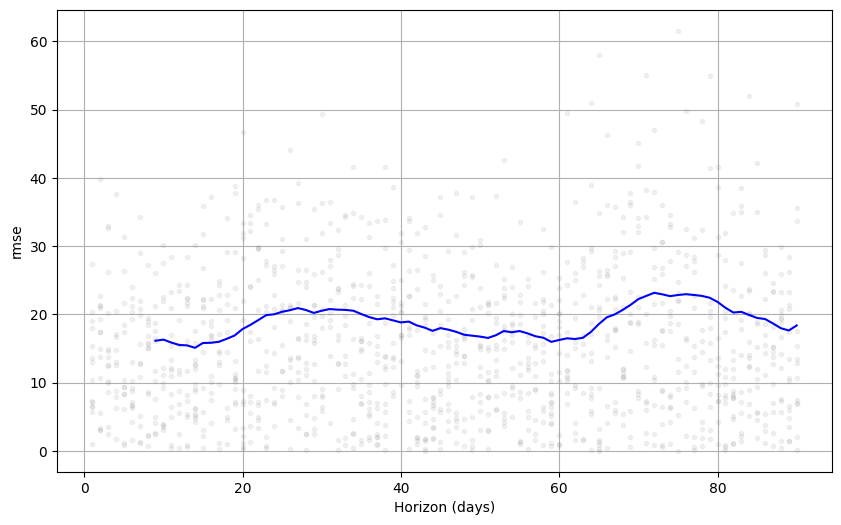

In [135]:
plot_cross_validation_metric(df_cv,metric='rmse');

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



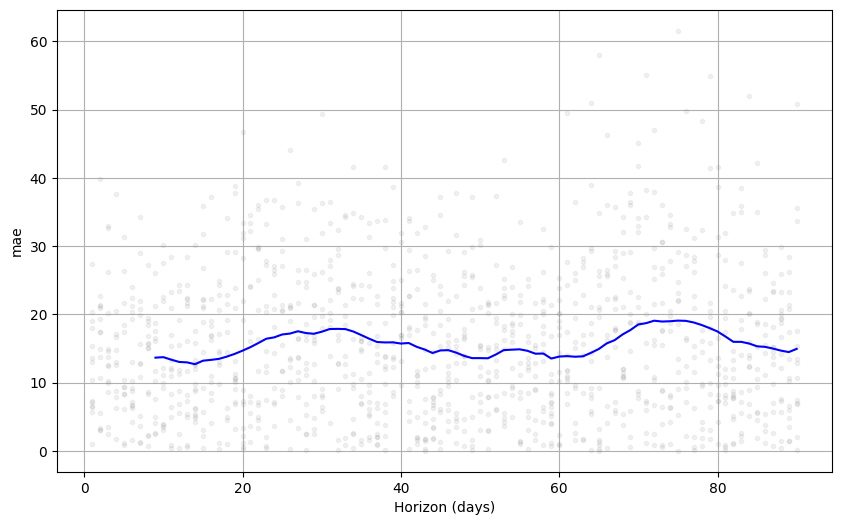

In [136]:
plot_cross_validation_metric(df_cv,metric='mae');

#Salvando o modelo

In [137]:
import json

In [138]:
from prophet.serialize import model_to_json

In [140]:
with open('modelo_o3_prophet.json', 'w') as file_out:
  json.dump(model_to_json(modelo_final),file_out)

In [ ]:
# para carregar o arquivo json
#from prophet.serialize import model_from_json